## **Project: To study the variety of words choice in Hari Raya song**

**Project Brackground**
* Everyone knows that festive-theme songs revolve around the same topics; celebration.
* Sometimes, I got tired listening to the same words repeated over and over again in Hari Raya song, especially the new ones.
* Is it hard for songwriters to go out of the typical words?
* In terms of choices of words, do the old songs beat the new ones?
* However, actually, I just wanted to test my web scrapping, data wrangling and data visualization skills.

**Project scope:**
* To look for the most frequent words choice in Hari Raya songs
* To compare the 'density' and 'creativity' of the old and new songs

*Definition*   
'Hari Raya' is a Malay word, equivalent word in English is 'Eid'    
It is celebrated by Muslims all over the world after a month of fasting (Ramadhan).  
Consider it as any other celebrations like Christmas, Lunar year etc. 

**Step 1: Scrape data from websites**

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import lxml

In [2]:
# Create function to scrape lyrics

def scrape_lyrics(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    lyrics = ''
    for i in soup.findAll('p'):
        lyrics = lyrics + ' ' +  i.text
    return(lyrics)

In [4]:
lagu1 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-selamat-hari-raya-saloma/')
lagu1

' Selamat aidil fitri\nKepada saudara serta saudari\nSetahun hanya sekali\nMerayakan hari yang mulia ini Di masa bulan Ramadan\nKita berpuasa hingga sebulan\nPabila Syawal menjelma\nHari raya disambut dengan gembira (Korus 1)\nMiskin kaya memakai baju baru warna-warni\nMengunjungi sanak kaum famili\nSungguh hebat pemandangan di hari raya ini\nTua muda wajah berseri-seri Selamat hari raya\nPada saudari saudara semua\nMarilah dengan gembira\nMerayakan aidilfitri yang mulia Di sana kelihatan\nBermacam kuih ketupat dan rendang\n[ Saloma Lyrics are found on www.songlyrics.com ]\nMintak bu kuih sepotong\nSaya mahu makan kerna perut kosong Dam dam dum bunyi mercun\nKanak-kanak segera datang berduyun\nDam dam dum mercun berdentum\nSemaraklah hari raya ini tahun (Korus 2)\nMaafkanlah jika ada terlanjur perkataan\nDiharap supaya jangan disimpan\nKuberdoa selamat panjang umur murah rezeki\nSemoga Tuhan akan memberkati Selamat hari raya\nHari untuk kita bersuka ria\nSelamat mari ucapkan\nUntuk kit

In [5]:
type(lagu1)

str

**Step 2: Wrangled Data**

In [6]:
lagu1_1 = lagu1.replace('\n', ' ')
lagu1_1

' Selamat aidil fitri Kepada saudara serta saudari Setahun hanya sekali Merayakan hari yang mulia ini Di masa bulan Ramadan Kita berpuasa hingga sebulan Pabila Syawal menjelma Hari raya disambut dengan gembira (Korus 1) Miskin kaya memakai baju baru warna-warni Mengunjungi sanak kaum famili Sungguh hebat pemandangan di hari raya ini Tua muda wajah berseri-seri Selamat hari raya Pada saudari saudara semua Marilah dengan gembira Merayakan aidilfitri yang mulia Di sana kelihatan Bermacam kuih ketupat dan rendang [ Saloma Lyrics are found on www.songlyrics.com ] Mintak bu kuih sepotong Saya mahu makan kerna perut kosong Dam dam dum bunyi mercun Kanak-kanak segera datang berduyun Dam dam dum mercun berdentum Semaraklah hari raya ini tahun (Korus 2) Maafkanlah jika ada terlanjur perkataan Diharap supaya jangan disimpan Kuberdoa selamat panjang umur murah rezeki Semoga Tuhan akan memberkati Selamat hari raya Hari untuk kita bersuka ria Selamat mari ucapkan Untuk kita hingga sampai tahun depan

In [7]:
lagu1_2 = lagu1_1.replace('(Korus 1)', '')
lagu1_2

' Selamat aidil fitri Kepada saudara serta saudari Setahun hanya sekali Merayakan hari yang mulia ini Di masa bulan Ramadan Kita berpuasa hingga sebulan Pabila Syawal menjelma Hari raya disambut dengan gembira  Miskin kaya memakai baju baru warna-warni Mengunjungi sanak kaum famili Sungguh hebat pemandangan di hari raya ini Tua muda wajah berseri-seri Selamat hari raya Pada saudari saudara semua Marilah dengan gembira Merayakan aidilfitri yang mulia Di sana kelihatan Bermacam kuih ketupat dan rendang [ Saloma Lyrics are found on www.songlyrics.com ] Mintak bu kuih sepotong Saya mahu makan kerna perut kosong Dam dam dum bunyi mercun Kanak-kanak segera datang berduyun Dam dam dum mercun berdentum Semaraklah hari raya ini tahun (Korus 2) Maafkanlah jika ada terlanjur perkataan Diharap supaya jangan disimpan Kuberdoa selamat panjang umur murah rezeki Semoga Tuhan akan memberkati Selamat hari raya Hari untuk kita bersuka ria Selamat mari ucapkan Untuk kita hingga sampai tahun depan Selamat 

In [9]:
lagu1_3 = lagu1_2.replace('(Korus 2)', '')
lagu1_3

' Selamat aidil fitri Kepada saudara serta saudari Setahun hanya sekali Merayakan hari yang mulia ini Di masa bulan Ramadan Kita berpuasa hingga sebulan Pabila Syawal menjelma Hari raya disambut dengan gembira  Miskin kaya memakai baju baru warna-warni Mengunjungi sanak kaum famili Sungguh hebat pemandangan di hari raya ini Tua muda wajah berseri-seri Selamat hari raya Pada saudari saudara semua Marilah dengan gembira Merayakan aidilfitri yang mulia Di sana kelihatan Bermacam kuih ketupat dan rendang [ Saloma Lyrics are found on www.songlyrics.com ] Mintak bu kuih sepotong Saya mahu makan kerna perut kosong Dam dam dum bunyi mercun Kanak-kanak segera datang berduyun Dam dam dum mercun berdentum Semaraklah hari raya ini tahun  Maafkanlah jika ada terlanjur perkataan Diharap supaya jangan disimpan Kuberdoa selamat panjang umur murah rezeki Semoga Tuhan akan memberkati Selamat hari raya Hari untuk kita bersuka ria Selamat mari ucapkan Untuk kita hingga sampai tahun depan Selamat hari raya

In [10]:
lagu1_4 = lagu1_3.replace('[ Saloma Lyrics are found on www.songlyrics.com ]', '')
lagu1_4

' Selamat aidil fitri Kepada saudara serta saudari Setahun hanya sekali Merayakan hari yang mulia ini Di masa bulan Ramadan Kita berpuasa hingga sebulan Pabila Syawal menjelma Hari raya disambut dengan gembira  Miskin kaya memakai baju baru warna-warni Mengunjungi sanak kaum famili Sungguh hebat pemandangan di hari raya ini Tua muda wajah berseri-seri Selamat hari raya Pada saudari saudara semua Marilah dengan gembira Merayakan aidilfitri yang mulia Di sana kelihatan Bermacam kuih ketupat dan rendang  Mintak bu kuih sepotong Saya mahu makan kerna perut kosong Dam dam dum bunyi mercun Kanak-kanak segera datang berduyun Dam dam dum mercun berdentum Semaraklah hari raya ini tahun  Maafkanlah jika ada terlanjur perkataan Diharap supaya jangan disimpan Kuberdoa selamat panjang umur murah rezeki Semoga Tuhan akan memberkati Selamat hari raya Hari untuk kita bersuka ria Selamat mari ucapkan Untuk kita hingga sampai tahun depan Selamat hari raya!'

In [21]:
lagu1_5 = lagu1_4.replace('raya!', 'raya')
lagu1_5

' Selamat aidil fitri Kepada saudara serta saudari Setahun hanya sekali Merayakan hari yang mulia ini Di masa bulan Ramadan Kita berpuasa hingga sebulan Pabila Syawal menjelma Hari raya disambut dengan gembira  Miskin kaya memakai baju baru warna-warni Mengunjungi sanak kaum famili Sungguh hebat pemandangan di hari raya ini Tua muda wajah berseri-seri Selamat hari raya Pada saudari saudara semua Marilah dengan gembira Merayakan aidilfitri yang mulia Di sana kelihatan Bermacam kuih ketupat dan rendang  Mintak bu kuih sepotong Saya mahu makan kerna perut kosong Dam dam dum bunyi mercun Kanak-kanak segera datang berduyun Dam dam dum mercun berdentum Semaraklah hari raya ini tahun  Maafkanlah jika ada terlanjur perkataan Diharap supaya jangan disimpan Kuberdoa selamat panjang umur murah rezeki Semoga Tuhan akan memberkati Selamat hari raya Hari untuk kita bersuka ria Selamat mari ucapkan Untuk kita hingga sampai tahun depan Selamat hari raya'

In [22]:
lagu1 = lagu1_5

**Step 3: Create dataframe**

In [23]:
def Convert(string): 
    final_text = list(string.split(" ")) 
    return final_text

In [24]:
lagu_saloma = Convert(lagu1.lower())
df1 = pd.DataFrame((lagu_saloma),columns =['Words'])
df1

,Words
0,
1,selamat
2,aidil
3,fitri
4,kepada
...,...
141,tahun
142,depan
143,selamat
144,hari


**Step 4: Repeat**

In [29]:
lagu2 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-dendang-perantau-p-ramlee/')
lagu2

' Di hari raya\nTerkenang daku kepada si dia\nKampungku indah nun jauh di sana\nAyah serta bondaku Di tepian mandi\nDanauku hijau yang aman damai selalu\nNun di sanalah tempat aku bertemu\nAku dan dia ( korus )\nApakan daya\nMasa tak akan kembali\nHancur musnahlah semuanya Impian yang murni\nTinggal menjadi kenang-kenanganku\nHanya rangkaian kata dan lagu\nDendang perantau ( ulang korus hingga akhir )'

In [32]:
lagu2_1 = lagu2.replace('\n', ' ')
lagu2_1

' Di hari raya Terkenang daku kepada si dia Kampungku indah nun jauh di sana Ayah serta bondaku Di tepian mandi Danauku hijau yang aman damai selalu Nun di sanalah tempat aku bertemu Aku dan dia ( korus ) Apakan daya Masa tak akan kembali Hancur musnahlah semuanya Impian yang murni Tinggal menjadi kenang-kenanganku Hanya rangkaian kata dan lagu Dendang perantau ( ulang korus hingga akhir )'

In [33]:
lagu2_2 = lagu2_1.replace('( korus )', '')
lagu2_2

' Di hari raya Terkenang daku kepada si dia Kampungku indah nun jauh di sana Ayah serta bondaku Di tepian mandi Danauku hijau yang aman damai selalu Nun di sanalah tempat aku bertemu Aku dan dia  Apakan daya Masa tak akan kembali Hancur musnahlah semuanya Impian yang murni Tinggal menjadi kenang-kenanganku Hanya rangkaian kata dan lagu Dendang perantau ( ulang korus hingga akhir )'

In [34]:
lagu2_3 = lagu2_2.replace('( ulang korus hingga akhir )', '')
lagu2_3

' Di hari raya Terkenang daku kepada si dia Kampungku indah nun jauh di sana Ayah serta bondaku Di tepian mandi Danauku hijau yang aman damai selalu Nun di sanalah tempat aku bertemu Aku dan dia  Apakan daya Masa tak akan kembali Hancur musnahlah semuanya Impian yang murni Tinggal menjadi kenang-kenanganku Hanya rangkaian kata dan lagu Dendang perantau '

In [36]:
lagu2 = lagu2_3
lagu2

' Di hari raya Terkenang daku kepada si dia Kampungku indah nun jauh di sana Ayah serta bondaku Di tepian mandi Danauku hijau yang aman damai selalu Nun di sanalah tempat aku bertemu Aku dan dia  Apakan daya Masa tak akan kembali Hancur musnahlah semuanya Impian yang murni Tinggal menjadi kenang-kenanganku Hanya rangkaian kata dan lagu Dendang perantau '

In [37]:
lagu_PRam = Convert(lagu2.lower())
df2 = pd.DataFrame((lagu_PRam),columns =['Words'])
df2

,Words
0,
1,di
2,hari
3,raya
4,terkenang
5,daku
6,kepada
7,si
8,dia
9,kampungku


In [38]:
lagu3 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-selamat-hari-raya-fazidah-joned/')
lagu3

' Aidil fitri hari bahgia\nHari yang mulia\nMohon maaf bersama dipinta\nSelamat… Selamat Hari Raya Sembah salam ayah dan bonda\nAmpunkanlah dosa\nHilangkanlah duka dan nestapa\nSelamat… Selamat Hari Raya *Chorus\nSemoga kita berjumpa lagi\nDi hari bahagia ini Mari teman mari saudara\nKita bergembira\nLupakan hatimu yang duka\nSelamat… Selamat Hari Raya'

In [39]:
lagu3_1 = lagu3.replace('\n', ' ')
lagu3_1

' Aidil fitri hari bahgia Hari yang mulia Mohon maaf bersama dipinta Selamat… Selamat Hari Raya Sembah salam ayah dan bonda Ampunkanlah dosa Hilangkanlah duka dan nestapa Selamat… Selamat Hari Raya *Chorus Semoga kita berjumpa lagi Di hari bahagia ini Mari teman mari saudara Kita bergembira Lupakan hatimu yang duka Selamat… Selamat Hari Raya'

In [48]:
lagu3_2 = lagu3_1.replace('*Chorus', '')
lagu3_2

' Aidil fitri hari bahgia Hari yang mulia Mohon maaf bersama dipinta Selamat… Selamat Hari Raya Sembah salam ayah dan bonda Ampunkanlah dosa Hilangkanlah duka dan nestapa Selamat… Selamat Hari Raya  Semoga kita berjumpa lagi Di hari bahagia ini Mari teman mari saudara Kita bergembira Lupakan hatimu yang duka Selamat… Selamat Hari Raya'

In [52]:
lagu3_3 = lagu3_2.replace('Selamat…', 'Selamat')
lagu3 = lagu3_3
lagu3

' Aidil fitri hari bahgia Hari yang mulia Mohon maaf bersama dipinta Selamat Selamat Hari Raya Sembah salam ayah dan bonda Ampunkanlah dosa Hilangkanlah duka dan nestapa Selamat Selamat Hari Raya  Semoga kita berjumpa lagi Di hari bahagia ini Mari teman mari saudara Kita bergembira Lupakan hatimu yang duka Selamat Selamat Hari Raya'

In [53]:
lagu_3 = Convert(lagu3.lower())
df3 = pd.DataFrame((lagu_3),columns =['Words'])
df3

,Words
0,
1,aidil
2,fitri
3,hari
4,bahgia
5,hari
6,yang
7,mulia
8,mohon
9,maaf


In [54]:
lagu4 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-suasana-hari-raya-sharifah-aini/')
lagu4

' Hai selamat hari raya\nKami semua ucapkan\nMenikmati hidangan\nYang kami sediakan Sila jamu selera\nDengan bermacam hidangan\nPilih yang mana suka\nSila janganlah segan ( korus 1 )\nRasalah ketupat ini\nDengan rendangnya sekali\nSudilah rasa kuihku\nPilihlah yang mana satu ( korus 2 )\nHai… di hari begini\nKita menjamu selera\nKita bermaaf-maafan\nDi suasana hari raya ( ulang dari mula )'

In [55]:
lagu4_1 = lagu4.replace('\n', ' ')
lagu4_1

' Hai selamat hari raya Kami semua ucapkan Menikmati hidangan Yang kami sediakan Sila jamu selera Dengan bermacam hidangan Pilih yang mana suka Sila janganlah segan ( korus 1 ) Rasalah ketupat ini Dengan rendangnya sekali Sudilah rasa kuihku Pilihlah yang mana satu ( korus 2 ) Hai… di hari begini Kita menjamu selera Kita bermaaf-maafan Di suasana hari raya ( ulang dari mula )'

In [56]:
lagu4_2 = lagu4_1.replace('( ulang dari mula )', '')
lagu4_2

' Hai selamat hari raya Kami semua ucapkan Menikmati hidangan Yang kami sediakan Sila jamu selera Dengan bermacam hidangan Pilih yang mana suka Sila janganlah segan ( korus 1 ) Rasalah ketupat ini Dengan rendangnya sekali Sudilah rasa kuihku Pilihlah yang mana satu ( korus 2 ) Hai… di hari begini Kita menjamu selera Kita bermaaf-maafan Di suasana hari raya '

In [57]:
lagu4_3 = lagu4_2.replace('( korus 1 )', '')
lagu4_3

' Hai selamat hari raya Kami semua ucapkan Menikmati hidangan Yang kami sediakan Sila jamu selera Dengan bermacam hidangan Pilih yang mana suka Sila janganlah segan  Rasalah ketupat ini Dengan rendangnya sekali Sudilah rasa kuihku Pilihlah yang mana satu ( korus 2 ) Hai… di hari begini Kita menjamu selera Kita bermaaf-maafan Di suasana hari raya '

In [58]:
lagu4_4 = lagu4_3.replace('( korus 2 )', '')
lagu4_4

' Hai selamat hari raya Kami semua ucapkan Menikmati hidangan Yang kami sediakan Sila jamu selera Dengan bermacam hidangan Pilih yang mana suka Sila janganlah segan  Rasalah ketupat ini Dengan rendangnya sekali Sudilah rasa kuihku Pilihlah yang mana satu  Hai… di hari begini Kita menjamu selera Kita bermaaf-maafan Di suasana hari raya '

In [60]:
lagu4_5 = lagu4_4.replace('Hai…', 'Hai')
lagu4 = lagu4_5
lagu4

' Hai selamat hari raya Kami semua ucapkan Menikmati hidangan Yang kami sediakan Sila jamu selera Dengan bermacam hidangan Pilih yang mana suka Sila janganlah segan  Rasalah ketupat ini Dengan rendangnya sekali Sudilah rasa kuihku Pilihlah yang mana satu  Hai di hari begini Kita menjamu selera Kita bermaaf-maafan Di suasana hari raya '

In [61]:
lagu_4 = Convert(lagu4.lower())
df4 = pd.DataFrame((lagu_3),columns =['Words'])
df4

,Words
0,
1,aidil
2,fitri
3,hari
4,bahgia
5,hari
6,yang
7,mulia
8,mohon
9,maaf


In [62]:
lagu5 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-seloka-hari-raya-hail-amir-uji-rashid/')
lagu5

' HA:\nIndahnya sungguh di hari raya\nRamainya orang bersuka ria\n( 2 X ) Adikku manis cantik bergaya\nBolehkah abang ikut bersama\n( 2 X ) UR:\nUsahlah abang membuang waktu\nMari menuju ke rumah bonda\n( 2 X ) Sanak saudara sedang menunggu\nDi hari mulia bertemu mesra\n( 2 X ) HA:\nKatamu itu abang mengerti\nKusanjung budi puteri ibunda\n( 2 X ) Pada yang tua kita hormati\nBarulah hidup saling bahagia\n( 2 X ) UR:\nMiskin dan kaya sama sahaja\nHulurkan tangan berjabat mesra\n( 2 X ) HA: & UR:\nSaling bermaaf kita bersama\nLupakan saja sengketa lama\n( 2 X )'

In [63]:
lagu5_1 = lagu5.replace('\n', ' ')
lagu5_1

' HA: Indahnya sungguh di hari raya Ramainya orang bersuka ria ( 2 X ) Adikku manis cantik bergaya Bolehkah abang ikut bersama ( 2 X ) UR: Usahlah abang membuang waktu Mari menuju ke rumah bonda ( 2 X ) Sanak saudara sedang menunggu Di hari mulia bertemu mesra ( 2 X ) HA: Katamu itu abang mengerti Kusanjung budi puteri ibunda ( 2 X ) Pada yang tua kita hormati Barulah hidup saling bahagia ( 2 X ) UR: Miskin dan kaya sama sahaja Hulurkan tangan berjabat mesra ( 2 X ) HA: & UR: Saling bermaaf kita bersama Lupakan saja sengketa lama ( 2 X )'

In [64]:
lagu5_2 = lagu5_1.replace('HA: ', '')
lagu5_2

' Indahnya sungguh di hari raya Ramainya orang bersuka ria ( 2 X ) Adikku manis cantik bergaya Bolehkah abang ikut bersama ( 2 X ) UR: Usahlah abang membuang waktu Mari menuju ke rumah bonda ( 2 X ) Sanak saudara sedang menunggu Di hari mulia bertemu mesra ( 2 X ) Katamu itu abang mengerti Kusanjung budi puteri ibunda ( 2 X ) Pada yang tua kita hormati Barulah hidup saling bahagia ( 2 X ) UR: Miskin dan kaya sama sahaja Hulurkan tangan berjabat mesra ( 2 X ) & UR: Saling bermaaf kita bersama Lupakan saja sengketa lama ( 2 X )'

In [65]:
lagu5_3 = lagu5_2.replace('UR: ', '')
lagu5_3

' Indahnya sungguh di hari raya Ramainya orang bersuka ria ( 2 X ) Adikku manis cantik bergaya Bolehkah abang ikut bersama ( 2 X ) Usahlah abang membuang waktu Mari menuju ke rumah bonda ( 2 X ) Sanak saudara sedang menunggu Di hari mulia bertemu mesra ( 2 X ) Katamu itu abang mengerti Kusanjung budi puteri ibunda ( 2 X ) Pada yang tua kita hormati Barulah hidup saling bahagia ( 2 X ) Miskin dan kaya sama sahaja Hulurkan tangan berjabat mesra ( 2 X ) & Saling bermaaf kita bersama Lupakan saja sengketa lama ( 2 X )'

In [67]:
lagu5_4 = lagu5_3.replace('( 2 X )', '')
lagu5_4

' Indahnya sungguh di hari raya Ramainya orang bersuka ria  Adikku manis cantik bergaya Bolehkah abang ikut bersama  Usahlah abang membuang waktu Mari menuju ke rumah bonda  Sanak saudara sedang menunggu Di hari mulia bertemu mesra  Katamu itu abang mengerti Kusanjung budi puteri ibunda  Pada yang tua kita hormati Barulah hidup saling bahagia  Miskin dan kaya sama sahaja Hulurkan tangan berjabat mesra  & Saling bermaaf kita bersama Lupakan saja sengketa lama '

In [69]:
lagu5_5 = lagu5_4.replace('& ', '')
lagu5 = lagu5_5
lagu5

' Indahnya sungguh di hari raya Ramainya orang bersuka ria  Adikku manis cantik bergaya Bolehkah abang ikut bersama  Usahlah abang membuang waktu Mari menuju ke rumah bonda  Sanak saudara sedang menunggu Di hari mulia bertemu mesra  Katamu itu abang mengerti Kusanjung budi puteri ibunda  Pada yang tua kita hormati Barulah hidup saling bahagia  Miskin dan kaya sama sahaja Hulurkan tangan berjabat mesra  Saling bermaaf kita bersama Lupakan saja sengketa lama '

In [70]:
lagu_5 = Convert(lagu5.lower())
df5 = pd.DataFrame((lagu_5),columns =['Words'])
df5

,Words
0,
1,indahnya
2,sungguh
3,di
4,hari
...,...
73,lupakan
74,saja
75,sengketa
76,lama


In [71]:
lagu6 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-dari-jauh-kupohon-maaf-sudirman/')
lagu6

' Dalam dingin subuh hatiku terusik\nKenang nasib diri di rantauan\nBergema takbir raya menitis air mata\nTerbayang suasana permai desa Rindu hati ini inginku kembali\nPada ayah bonda dan saudara\nTetapi aku harus mencari rezeki\nMembela nasib kita bersama ( korus )\nHanya ku sampaikan doa dan kiriman tulus ikhlas\nDari jauh kupohonkan ampun maaf\nJangan sedih pagi ini tak dapat kita bersama\nMeraikan aidil fitri yang mulia Restu ayah bonda kuharap selalu\nHingga aku pulang kepadamu ( ulang korus ) Restu ayah bonda kuharap selalu\nDemi anakmu yang kini jauh'

In [72]:
lagu6_1 = lagu6.replace('\n', ' ')
lagu6_1

' Dalam dingin subuh hatiku terusik Kenang nasib diri di rantauan Bergema takbir raya menitis air mata Terbayang suasana permai desa Rindu hati ini inginku kembali Pada ayah bonda dan saudara Tetapi aku harus mencari rezeki Membela nasib kita bersama ( korus ) Hanya ku sampaikan doa dan kiriman tulus ikhlas Dari jauh kupohonkan ampun maaf Jangan sedih pagi ini tak dapat kita bersama Meraikan aidil fitri yang mulia Restu ayah bonda kuharap selalu Hingga aku pulang kepadamu ( ulang korus ) Restu ayah bonda kuharap selalu Demi anakmu yang kini jauh'

In [73]:
lagu6_2 = lagu6_1.replace('( korus ) ', '')
lagu6_2

' Dalam dingin subuh hatiku terusik Kenang nasib diri di rantauan Bergema takbir raya menitis air mata Terbayang suasana permai desa Rindu hati ini inginku kembali Pada ayah bonda dan saudara Tetapi aku harus mencari rezeki Membela nasib kita bersama Hanya ku sampaikan doa dan kiriman tulus ikhlas Dari jauh kupohonkan ampun maaf Jangan sedih pagi ini tak dapat kita bersama Meraikan aidil fitri yang mulia Restu ayah bonda kuharap selalu Hingga aku pulang kepadamu ( ulang korus ) Restu ayah bonda kuharap selalu Demi anakmu yang kini jauh'

In [75]:
lagu6_3 = lagu6_2.replace('( ulang korus ) ', '')
lagu6 = lagu6_3
lagu6

' Dalam dingin subuh hatiku terusik Kenang nasib diri di rantauan Bergema takbir raya menitis air mata Terbayang suasana permai desa Rindu hati ini inginku kembali Pada ayah bonda dan saudara Tetapi aku harus mencari rezeki Membela nasib kita bersama Hanya ku sampaikan doa dan kiriman tulus ikhlas Dari jauh kupohonkan ampun maaf Jangan sedih pagi ini tak dapat kita bersama Meraikan aidil fitri yang mulia Restu ayah bonda kuharap selalu Hingga aku pulang kepadamu Restu ayah bonda kuharap selalu Demi anakmu yang kini jauh'

In [76]:
lagu_6 = Convert(lagu6.lower())
df6 = pd.DataFrame((lagu_5),columns =['Words'])
df6

,Words
0,
1,indahnya
2,sungguh
3,di
4,hari
...,...
73,lupakan
74,saja
75,sengketa
76,lama


In [77]:
lagu7 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-kepulangan-yang-dinanti-aman-shah/')
lagu7

' Bergema suara takbir di angkasa\nSelembut bayu meresap ke dalam jiwa\nBetapa hatimu terharu\nMenyambut anakmu kembali Terbayang senyuman di wajah nan sepi\nPulangnya anakmu di pagi yang murni\nKasihmu seharum kasturi\nMelambai anakmu kembali ( korus )\nDalam dakapan keheningan maya\nPertemuan yang menyentuh di jiwa\nSekian lamanya terpisah\nHarapan kini menjadi nyata Kiranya perpisahan terjadi lagi\nAnakmu pergi mencurahkan bakti\nDoamu teriring selalu\nSemoga bertemu kembali ( ulang dari mula ) Pulanglah di hari raya\nBegitulah harapan ayahanda'

In [78]:
lagu7_1 = lagu7.replace('\n', ' ')
lagu7_1

' Bergema suara takbir di angkasa Selembut bayu meresap ke dalam jiwa Betapa hatimu terharu Menyambut anakmu kembali Terbayang senyuman di wajah nan sepi Pulangnya anakmu di pagi yang murni Kasihmu seharum kasturi Melambai anakmu kembali ( korus ) Dalam dakapan keheningan maya Pertemuan yang menyentuh di jiwa Sekian lamanya terpisah Harapan kini menjadi nyata Kiranya perpisahan terjadi lagi Anakmu pergi mencurahkan bakti Doamu teriring selalu Semoga bertemu kembali ( ulang dari mula ) Pulanglah di hari raya Begitulah harapan ayahanda'

In [79]:
lagu7_2 = lagu7_1.replace('( korus ) ', '')
lagu7_2

' Bergema suara takbir di angkasa Selembut bayu meresap ke dalam jiwa Betapa hatimu terharu Menyambut anakmu kembali Terbayang senyuman di wajah nan sepi Pulangnya anakmu di pagi yang murni Kasihmu seharum kasturi Melambai anakmu kembali Dalam dakapan keheningan maya Pertemuan yang menyentuh di jiwa Sekian lamanya terpisah Harapan kini menjadi nyata Kiranya perpisahan terjadi lagi Anakmu pergi mencurahkan bakti Doamu teriring selalu Semoga bertemu kembali ( ulang dari mula ) Pulanglah di hari raya Begitulah harapan ayahanda'

In [81]:
lagu7_3 = lagu7_2.replace('( ulang dari mula ) ', '')
lagu7 = lagu7_3
lagu7

' Bergema suara takbir di angkasa Selembut bayu meresap ke dalam jiwa Betapa hatimu terharu Menyambut anakmu kembali Terbayang senyuman di wajah nan sepi Pulangnya anakmu di pagi yang murni Kasihmu seharum kasturi Melambai anakmu kembali Dalam dakapan keheningan maya Pertemuan yang menyentuh di jiwa Sekian lamanya terpisah Harapan kini menjadi nyata Kiranya perpisahan terjadi lagi Anakmu pergi mencurahkan bakti Doamu teriring selalu Semoga bertemu kembali Pulanglah di hari raya Begitulah harapan ayahanda'

In [89]:
lagu_7 = Convert(lagu7.lower())
df7 = pd.DataFrame((lagu_7),columns =['Words'])
df7

,Words
0,
1,bergema
2,suara
3,takbir
4,di
...,...
68,hari
69,raya
70,begitulah
71,harapan


In [83]:
lagu8 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-cahaya-aidil-fitri-black-dog-bone/')
lagu8

' Bila tiba hari raya\nSemua insan bergembira\nTetapi bagiku hanya kesedihan\nYang menyelubungi hidup Ayah dan juga ibuku\nTelah pergi selamanya\nTerbiarlah aku ibarat musafir\nYang haus di padang pasir ( korus )\nSiapakah yang sudi\nMenghulurkan simpati\nKepada nasibku ini\nAgar dapat kurasa\nNikmat di hari raya\nSeperti insan yang lain Ku meminta dan berdoa\nKepada Yang Maha Esa\nTabahkan hati berilah pedoman\nCahaya Di Aidil Fitri ( ulang dari korus )'

In [84]:
lagu8_1 = lagu8.replace('\n', ' ')
lagu8_1

' Bila tiba hari raya Semua insan bergembira Tetapi bagiku hanya kesedihan Yang menyelubungi hidup Ayah dan juga ibuku Telah pergi selamanya Terbiarlah aku ibarat musafir Yang haus di padang pasir ( korus ) Siapakah yang sudi Menghulurkan simpati Kepada nasibku ini Agar dapat kurasa Nikmat di hari raya Seperti insan yang lain Ku meminta dan berdoa Kepada Yang Maha Esa Tabahkan hati berilah pedoman Cahaya Di Aidil Fitri ( ulang dari korus )'

In [85]:
lagu8_2 = lagu8_1.replace('( korus ) ', '')
lagu8_2

' Bila tiba hari raya Semua insan bergembira Tetapi bagiku hanya kesedihan Yang menyelubungi hidup Ayah dan juga ibuku Telah pergi selamanya Terbiarlah aku ibarat musafir Yang haus di padang pasir Siapakah yang sudi Menghulurkan simpati Kepada nasibku ini Agar dapat kurasa Nikmat di hari raya Seperti insan yang lain Ku meminta dan berdoa Kepada Yang Maha Esa Tabahkan hati berilah pedoman Cahaya Di Aidil Fitri ( ulang dari korus )'

In [87]:
lagu8_3 = lagu8_2.replace('( ulang dari korus )', '')
lagu8 = lagu8_3
lagu8

' Bila tiba hari raya Semua insan bergembira Tetapi bagiku hanya kesedihan Yang menyelubungi hidup Ayah dan juga ibuku Telah pergi selamanya Terbiarlah aku ibarat musafir Yang haus di padang pasir Siapakah yang sudi Menghulurkan simpati Kepada nasibku ini Agar dapat kurasa Nikmat di hari raya Seperti insan yang lain Ku meminta dan berdoa Kepada Yang Maha Esa Tabahkan hati berilah pedoman Cahaya Di Aidil Fitri '

In [88]:
lagu_8 = Convert(lagu8.lower())
df8 = pd.DataFrame((lagu_8),columns =['Words'])
df8

,Words
0,
1,bila
2,tiba
3,hari
4,raya
...,...
62,cahaya
63,di
64,aidil
65,fitri


In [90]:
lagu9 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-suasana-di-hari-raya-anuar-zain-elina/')
lagu9

' Anuar Zain:\nBerlalulah sudah ramadan sebulan berpuasa\nTiba syawal kita rayakan dengan rasa gembira\nAnak muda di rantauan semuanya pulang ke desa\nIbu dan ayah keriangan bersyukur tak terkira Elina:\nBertukar senyuman dan salam ziarah-menziarahi\nTutur dan kata yang sopan saling memaafi\nSuasana hari raya walau di mana pun jua\nMemberikan ketenangan dan mententeramkan jiwa Anuar Zain:\nKuih dan muih beranika macam\nMakanlah jangan hanya di pandang Elina:\nKetupat rendang sila nikmati kawan\nPenat memasak malam ke pagi Anuar Zain:\nWajik dan dodol jangan lupakan\nPeninggalan nenek zaman berzaman Elina:\nAsyik bersembang pakcik dan makcik\nHai duit raya lupa nak di beri Anuar Zain & Elina:\nBerlalulah sudah ramadan sebulan berpuasa\nTiba syawal kita rayakan dengan rasa gembira\nAnak muda di rantauan semuanya pulang ke desa\nIbu dan ayah keriangan bersyukur tak terkira Anuar Zain:\nKuih dan muih beranika macam\nMakanlah jangan hanya di pandang Elina:\nKetupat rendang sila nikmati kawa

In [91]:
lagu9_1 = lagu9.replace('\n', ' ')
lagu9_1

' Anuar Zain: Berlalulah sudah ramadan sebulan berpuasa Tiba syawal kita rayakan dengan rasa gembira Anak muda di rantauan semuanya pulang ke desa Ibu dan ayah keriangan bersyukur tak terkira Elina: Bertukar senyuman dan salam ziarah-menziarahi Tutur dan kata yang sopan saling memaafi Suasana hari raya walau di mana pun jua Memberikan ketenangan dan mententeramkan jiwa Anuar Zain: Kuih dan muih beranika macam Makanlah jangan hanya di pandang Elina: Ketupat rendang sila nikmati kawan Penat memasak malam ke pagi Anuar Zain: Wajik dan dodol jangan lupakan Peninggalan nenek zaman berzaman Elina: Asyik bersembang pakcik dan makcik Hai duit raya lupa nak di beri Anuar Zain & Elina: Berlalulah sudah ramadan sebulan berpuasa Tiba syawal kita rayakan dengan rasa gembira Anak muda di rantauan semuanya pulang ke desa Ibu dan ayah keriangan bersyukur tak terkira Anuar Zain: Kuih dan muih beranika macam Makanlah jangan hanya di pandang Elina: Ketupat rendang sila nikmati kawan Penat memasak malam k

In [93]:
lagu9_2 = lagu9_1.replace('Anuar Zain: ', '')
lagu9_2

' Berlalulah sudah ramadan sebulan berpuasa Tiba syawal kita rayakan dengan rasa gembira Anak muda di rantauan semuanya pulang ke desa Ibu dan ayah keriangan bersyukur tak terkira Elina: Bertukar senyuman dan salam ziarah-menziarahi Tutur dan kata yang sopan saling memaafi Suasana hari raya walau di mana pun jua Memberikan ketenangan dan mententeramkan jiwa Kuih dan muih beranika macam Makanlah jangan hanya di pandang Elina: Ketupat rendang sila nikmati kawan Penat memasak malam ke pagi Wajik dan dodol jangan lupakan Peninggalan nenek zaman berzaman Elina: Asyik bersembang pakcik dan makcik Hai duit raya lupa nak di beri Anuar Zain & Elina: Berlalulah sudah ramadan sebulan berpuasa Tiba syawal kita rayakan dengan rasa gembira Anak muda di rantauan semuanya pulang ke desa Ibu dan ayah keriangan bersyukur tak terkira Kuih dan muih beranika macam Makanlah jangan hanya di pandang Elina: Ketupat rendang sila nikmati kawan Penat memasak malam ke pagi Wajik dan dodol jangan lupakan Peninggala

In [95]:
lagu9_3 = lagu9_2.replace('Elina: ', '')
lagu9 = lagu9_3

In [96]:
lagu_9 = Convert(lagu9.lower())
df9 = pd.DataFrame((lagu_9),columns =['Words'])
df9

,Words
0,
1,berlalulah
2,sudah
3,ramadan
4,sebulan
...,...
160,raya
161,lupa
162,nak
163,di


In [97]:
lagu10 = scrape_lyrics('https://iliriklagu.net/lirik-lagu-satu-hari-di-hari-raya-m-nasir/')
lagu10

' Satu hari di Hari Raya\nKu lihat cahaya bersinar indah\nLangit cemerlang tak terkira\nTanda kuasa yang Maha Esa\nMemberi nikmat pada manusia Satu hari di Hari Raya\nKu dengar irama yang sungguh indah\nKu coba mendekati padanya\nKira irama itu adalah\nSuara pujian pada yang Esa Satu hari di Hari Raya\nAku menangis tanda gembira\nAku menangis tanda ku cinta kepadaNya Satu hari di Hari Raya\nKu lihat wajah suci ibuku\nKu lihat wajah kasih ayahku\nKu gembira\nMungkin inilah dia kebahagiaan'

In [99]:
lagu10_1 = lagu10.replace('\n', ' ')
lagu10 = lagu10_1
lagu10

' Satu hari di Hari Raya Ku lihat cahaya bersinar indah Langit cemerlang tak terkira Tanda kuasa yang Maha Esa Memberi nikmat pada manusia Satu hari di Hari Raya Ku dengar irama yang sungguh indah Ku coba mendekati padanya Kira irama itu adalah Suara pujian pada yang Esa Satu hari di Hari Raya Aku menangis tanda gembira Aku menangis tanda ku cinta kepadaNya Satu hari di Hari Raya Ku lihat wajah suci ibuku Ku lihat wajah kasih ayahku Ku gembira Mungkin inilah dia kebahagiaan'

In [100]:
lagu_10 = Convert(lagu10.lower())
df10 = pd.DataFrame((lagu_10),columns =['Words'])
df10

,Words
0,
1,satu
2,hari
3,di
4,hari
...,...
79,gembira
80,mungkin
81,inilah
82,dia


In [338]:
df_lama = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
old_songs = pd.concat(df_lama)
old_songs.describe()

,count
count,849.000000
mean,8.243816
std,11.051900
min,1.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,37.000000


In [129]:
counts_old = old_songs['Words'].value_counts()
word_freq = pd.DataFrame(counts_old, )
word_freq.

,Words
hari,37
,34
di,32
raya,25
dan,22
...,...
menyambut,1
bondaku,1
mahu,1
makan,1


In [149]:
old_songs['count'] = old_songs.groupby('Words')['Words'].transform('count')
old_songs

,Words,count
0,,34
1,selamat,18
2,aidil,4
3,fitri,4
4,kepada,4
...,...,...
79,gembira,6
80,mungkin,1
81,inilah,1
82,dia,3


In [150]:
old_songs1 = old_songs.drop(old_songs.index[0])
old_songs1

,Words,count
1,selamat,18
2,aidil,4
3,fitri,4
4,kepada,4
5,saudara,6
...,...,...
79,gembira,6
80,mungkin,1
81,inilah,1
82,dia,3


In [156]:
old_songs1.sort_values(by='count', ascending=False)

,Words,count
3,hari,37
2,hari,37
144,hari,37
49,hari,37
44,hari,37
...,...,...
61,pedoman,1
125,memberkati,1
123,tuhan,1
121,rezeki,1


In [157]:
boolean = not old_songs1["Words"].is_unique
boolean

True

In [166]:
print('The shape of the dataframe is :',old_songs1.shape)

The shape of the dataframe is : (849, 2)


In [168]:
old_songs1['Words'].isnull().sum()

0

In [340]:
# Create the total list of word

lagu_lama = lagu1 + lagu2 + lagu3 + lagu4 + lagu5 + lagu6 + lagu7 + lagu8 + lagu9 + lagu10
lagu_raya_lama = lagu_lama.lower()
lagu_raya_lama

' selamat aidil fitri kepada saudara serta saudari setahun hanya sekali merayakan hari yang mulia ini di masa bulan ramadan kita berpuasa hingga sebulan pabila syawal menjelma hari raya disambut dengan gembira  miskin kaya memakai baju baru warna-warni mengunjungi sanak kaum famili sungguh hebat pemandangan di hari raya ini tua muda wajah berseri-seri selamat hari raya pada saudari saudara semua marilah dengan gembira merayakan aidilfitri yang mulia di sana kelihatan bermacam kuih ketupat dan rendang  mintak bu kuih sepotong saya mahu makan kerna perut kosong dam dam dum bunyi mercun kanak-kanak segera datang berduyun dam dam dum mercun berdentum semaraklah hari raya ini tahun  maafkanlah jika ada terlanjur perkataan diharap supaya jangan disimpan kuberdoa selamat panjang umur murah rezeki semoga tuhan akan memberkati selamat hari raya hari untuk kita bersuka ria selamat mari ucapkan untuk kita hingga sampai tahun depan selamat hari raya di hari raya terkenang daku kepada si dia kampun

In [345]:
import csv

reader = csv.reader(lagu_raya_lama.splitlines(), skipinitialspace=True)
with open('lagu_raya_lama.csv', 'w') as out_file:
    writer = csv.writer(out_file)
    writer.writerows(reader)

In [346]:
reader = csv.reader(lagu_raya_baru.splitlines(), skipinitialspace=True)
with open('lagu_raya_baru.csv', 'w') as out_file:
    writer = csv.writer(out_file)
    writer.writerows(reader)

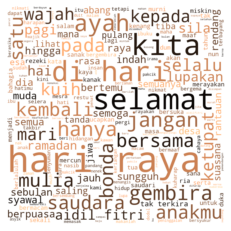

In [347]:
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="copper", 
                      stopwords=["dan", "yang", "di", "dengan", "ini", "aku", "ku", "dalam", "ke", "dam"]).generate(lagu_raya_lama)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [241]:
#Save the file to png format
wordcloud.to_file("lagu_lama.png")

In [244]:
lagu11 = scrape_lyrics('https://genius.com/Aiman-tino-lara-dalam-kerinduan-lyrics')
lagu11

' Termenung\nRaya hampir tiba\nTerkenang pada ayahanda\nYang jauh disana\n\nKu eindu mahu bersama mu\nBersalaman di hari raya\nJatuh air mataku\nSedihnya raya ku tanpa mu\nMahu gembira mahu kau ada bersamaku\n\nDi hari yang mulia\nPasti akan terluka\nOh Tuhan tabahkan hatiku\nSelamat Hari Raya ku ucapkan pada semua saudara\n\nBiarkan ku sepi tanpa mu\nDi hari yang mulia\nKu ucapkan pada mu\nSelamat Hari Raya\n\nSelamat Hari Raya ku ucapkan pada semua saudara\nBiarkan ku sepi tanpa mu\nDi hari yang mulia\nKu ucapkan pada mu\n\nSelamat Hari Raya\n\nTermenung\nRaya hampir tiba\nTerkenang pada ayahanda\nYang jauh disana\n\nMenuju ku ke pesara mu\nKu berdoa pada yang Esa\nAmpunkan dosa-dosa mu'

In [246]:
lagu11_1 = lagu11.replace('\n', ' ')
lagu11 = lagu11_1
lagu11

' Termenung Raya hampir tiba Terkenang pada ayahanda Yang jauh disana  Ku eindu mahu bersama mu Bersalaman di hari raya Jatuh air mataku Sedihnya raya ku tanpa mu Mahu gembira mahu kau ada bersamaku  Di hari yang mulia Pasti akan terluka Oh Tuhan tabahkan hatiku Selamat Hari Raya ku ucapkan pada semua saudara  Biarkan ku sepi tanpa mu Di hari yang mulia Ku ucapkan pada mu Selamat Hari Raya  Selamat Hari Raya ku ucapkan pada semua saudara Biarkan ku sepi tanpa mu Di hari yang mulia Ku ucapkan pada mu  Selamat Hari Raya  Termenung Raya hampir tiba Terkenang pada ayahanda Yang jauh disana  Menuju ku ke pesara mu Ku berdoa pada yang Esa Ampunkan dosa-dosa mu'

In [252]:
lagu12 = scrape_lyrics('https://www.metrolyrics.com/bersyukur-seadanya-lyrics-hael-husaini.html')
lagu12

' Wahai Semua insan\nTakbir Berkumandang akhir ramdhan\nSiap Sedia pulang ke desa menyambut raya Wahai Semua insan\nBerjabat Tangan bersama semua\nPinta Ampun maaf pada mereka jernihkan sengketa Hati Gembira berjumpa semua\nSanak Saudara pagi raya\nSedih Terasa mengenang pada\nInsan Yang dulu kini tiada Selamat Hari raya\nSelamat Hari raya\nSambut Sederhana biarlah bersyukur seadanya Selamat Hari raya\nSelamat Hari raya\nBahagiakan Keluarga bersyukur seadanya Wahai Semua insan\nIngat Ingat bila nak berbelanja\nSedikit Tak apa berpada pada bersyukur nikmatnya Hati Gembira berjumpa semua\nSanak Saudara pagi raya\nSedih Terasa mengenang pada\nInsan Yang dulu kini tiada Selamat Hari raya\nSelamat Hari raya\nSambut Sederhana biarlah bersyukur seadanya Selamat Hari raya\nSelamat Hari raya\nBahagiakan Keluarga bersyukur seadanya Selamat Hari raya\nBersyukur Seadanya\nSelamat Hari raya\nBersyukur Seadanya Selamat Hari raya\nSelamat Hari raya\nSambut Sederhana biarlah bersyukur seadanya Selamat

In [253]:
lagu12_1 = lagu12.replace('\n', ' ')
lagu12_1

' Wahai Semua insan Takbir Berkumandang akhir ramdhan Siap Sedia pulang ke desa menyambut raya Wahai Semua insan Berjabat Tangan bersama semua Pinta Ampun maaf pada mereka jernihkan sengketa Hati Gembira berjumpa semua Sanak Saudara pagi raya Sedih Terasa mengenang pada Insan Yang dulu kini tiada Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari raya Bahagiakan Keluarga bersyukur seadanya Wahai Semua insan Ingat Ingat bila nak berbelanja Sedikit Tak apa berpada pada bersyukur nikmatnya Hati Gembira berjumpa semua Sanak Saudara pagi raya Sedih Terasa mengenang pada Insan Yang dulu kini tiada Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari raya Bahagiakan Keluarga bersyukur seadanya Selamat Hari raya Bersyukur Seadanya Selamat Hari raya Bersyukur Seadanya Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari r

In [255]:
lagu12_2 = lagu12_1.replace('Last.fm Music | Copyright © 2020 CBS Interactive Inc. / All rights reserved.', '')
lagu12 = lagu12_2
lagu12

' Wahai Semua insan Takbir Berkumandang akhir ramdhan Siap Sedia pulang ke desa menyambut raya Wahai Semua insan Berjabat Tangan bersama semua Pinta Ampun maaf pada mereka jernihkan sengketa Hati Gembira berjumpa semua Sanak Saudara pagi raya Sedih Terasa mengenang pada Insan Yang dulu kini tiada Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari raya Bahagiakan Keluarga bersyukur seadanya Wahai Semua insan Ingat Ingat bila nak berbelanja Sedikit Tak apa berpada pada bersyukur nikmatnya Hati Gembira berjumpa semua Sanak Saudara pagi raya Sedih Terasa mengenang pada Insan Yang dulu kini tiada Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari raya Bahagiakan Keluarga bersyukur seadanya Selamat Hari raya Bersyukur Seadanya Selamat Hari raya Bersyukur Seadanya Selamat Hari raya Selamat Hari raya Sambut Sederhana biarlah bersyukur seadanya Selamat Hari raya Selamat Hari r

In [261]:
lagu13 = scrape_lyrics('https://ohlirik.com/tag/lirik-lagu-raya-nusantara/')
lagu13

' Lirik Lagu Raya Nusantara – Ismail Izzani, Sufi Rashid & Siti Nordiana ft Rizky Febian & Fatin Shidqia  Kini Tiba hari bahagia\nYang Dinanti semua\nDalam Desa atau di kota\nKemeriahan Dirasa Bersama Meraikan lebaran\nAidil Fitri syawal mulia\nHari Raya disambut dengan gembira\nHari Raya ceriakan suasana\nKosong Kosong sesama kita merasakan indahnya\nHari Raya Bunga Api warnai malam\nMengukir Sejuta senyuman\nKuih Muih ketupat dan rendang\nMembuka Selera semua Bersama Meraikan lebaran\nAidil Fitri syawal mulia\nHari Raya disambut dengan gembira\nHari Raya ceriakan suasana\nKosong Kosong sesama kita merasakan indahnya\nHari Raya Berikan Masa istimewa\nSaling Maaf hilangkan duka\nEratkan Jalinan saudara\nLebaran Kan lebih bermakna Bersama Meraikan lebaran\nAidil Fitri syawal mulia\nHari Raya disambut dengan gembira\nHari Raya ceriakan suasana\nKosong Kosong sesama kita merasakan indahnya\nHari Raya Hari Raya disambut dengan gembira\nHari Raya ceriakan suasana\nKosong Kosong sesama kita 

In [262]:
lagu13_1 = lagu13.replace('\n', ' ')
lagu13_1

' Lirik Lagu Raya Nusantara – Ismail Izzani, Sufi Rashid & Siti Nordiana ft Rizky Febian & Fatin Shidqia  Kini Tiba hari bahagia Yang Dinanti semua Dalam Desa atau di kota Kemeriahan Dirasa Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Bunga Api warnai malam Mengukir Sejuta senyuman Kuih Muih ketupat dan rendang Membuka Selera semua Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Berikan Masa istimewa Saling Maaf hilangkan duka Eratkan Jalinan saudara Lebaran Kan lebih bermakna Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Ra

In [264]:
lagu13_2 = lagu13_1.replace(" Video Klip Lagu Raya Nusantara – Ismail Izzani, Sufi Rashid & Siti Nordiana ft Rizky Febian & Fatin Shidqia                 \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ", '')
lagu13_2

' Lirik Lagu Raya Nusantara – Ismail Izzani, Sufi Rashid & Siti Nordiana ft Rizky Febian & Fatin Shidqia  Kini Tiba hari bahagia Yang Dinanti semua Dalam Desa atau di kota Kemeriahan Dirasa Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Bunga Api warnai malam Mengukir Sejuta senyuman Kuih Muih ketupat dan rendang Membuka Selera semua Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Berikan Masa istimewa Saling Maaf hilangkan duka Eratkan Jalinan saudara Lebaran Kan lebih bermakna Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Ra

In [266]:
lagu13_3 = lagu13_2.replace(' Lirik Lagu Raya Nusantara – Ismail Izzani, Sufi Rashid & Siti Nordiana ft Rizky Febian & Fatin Shidqia  ', '')
lagu13 = lagu13_3
lagu13

'Kini Tiba hari bahagia Yang Dinanti semua Dalam Desa atau di kota Kemeriahan Dirasa Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Bunga Api warnai malam Mengukir Sejuta senyuman Kuih Muih ketupat dan rendang Membuka Selera semua Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Berikan Masa istimewa Saling Maaf hilangkan duka Eratkan Jalinan saudara Lebaran Kan lebih bermakna Bersama Meraikan lebaran Aidil Fitri syawal mulia Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya Hari Raya disambut dengan gembira Hari Raya ceriakan suasana Kosong Kosong sesama kita merasakan indahnya Hari Raya'

In [268]:
lagu14 = scrape_lyrics('https://www.metrolyrics.com/ewah-ewah-lyrics-wany-hasrita.html')
lagu14

' Tak Dapat aku lukiskan\nManisnya hidup dengan mu\nCintamu untuk hamba\nTerletak elok di kalbu\nTak sempat hati mengenang\nKau datang memujuk rindu\nSejambak mawar cinta\nMewangi kamar jiwaku\nKalau rajuk ku dipujuk\nKalau lari ku dicari\nBertaut kasih sejunjung sirih\nBertingkah rindu sama\nSerentak\nBertingkah\nManis manis hidup dengan mu sayang (ewahh)\nTidak tidak pernah hati tersiksa (ewahh)\nSiang dan malam\nHidup berteman\nRasa bagai disyurga loka\nBenar benar kata para pujangga (ewahh)\nKalau kalau cinta merasuk jiwa (ewahh)\nAlam terbentang menjadi taman\nTaman kasih kan berdua\nManis manis hidup dengan mu sayang (ewahh)\nTidak tidak pernah hati tersiksa (ewahh)\nSiang dan malam\nHidup berteman\nRasa bagai disyurga loka\nBenar benar kata para pujangga (ewahh)\nKalau kalau cinta merasuk jiwa (ewahh)\nAlam terbentang menjadi taman\nTaman kasih kan berdua\nSiang dan malan\nHidup berteman\nRasa bagai disyurga loka\nAlam terbentang menjadi taman\nTaman kasih kan berdua Last.fm Mus

In [269]:
lagu14_1 = lagu14.replace('\n', ' ')
lagu14_1

' Tak Dapat aku lukiskan Manisnya hidup dengan mu Cintamu untuk hamba Terletak elok di kalbu Tak sempat hati mengenang Kau datang memujuk rindu Sejambak mawar cinta Mewangi kamar jiwaku Kalau rajuk ku dipujuk Kalau lari ku dicari Bertaut kasih sejunjung sirih Bertingkah rindu sama Serentak Bertingkah Manis manis hidup dengan mu sayang (ewahh) Tidak tidak pernah hati tersiksa (ewahh) Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga (ewahh) Kalau kalau cinta merasuk jiwa (ewahh) Alam terbentang menjadi taman Taman kasih kan berdua Manis manis hidup dengan mu sayang (ewahh) Tidak tidak pernah hati tersiksa (ewahh) Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga (ewahh) Kalau kalau cinta merasuk jiwa (ewahh) Alam terbentang menjadi taman Taman kasih kan berdua Siang dan malan Hidup berteman Rasa bagai disyurga loka Alam terbentang menjadi taman Taman kasih kan berdua Last.fm Music | Copyright © 2020 CBS Interactiv

In [271]:
lagu14_2 = lagu14_1.replace('(ewahh)', "ewahh")
lagu14_2

' Tak Dapat aku lukiskan Manisnya hidup dengan mu Cintamu untuk hamba Terletak elok di kalbu Tak sempat hati mengenang Kau datang memujuk rindu Sejambak mawar cinta Mewangi kamar jiwaku Kalau rajuk ku dipujuk Kalau lari ku dicari Bertaut kasih sejunjung sirih Bertingkah rindu sama Serentak Bertingkah Manis manis hidup dengan mu sayang ewahh Tidak tidak pernah hati tersiksa ewahh Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga ewahh Kalau kalau cinta merasuk jiwa ewahh Alam terbentang menjadi taman Taman kasih kan berdua Manis manis hidup dengan mu sayang ewahh Tidak tidak pernah hati tersiksa ewahh Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga ewahh Kalau kalau cinta merasuk jiwa ewahh Alam terbentang menjadi taman Taman kasih kan berdua Siang dan malan Hidup berteman Rasa bagai disyurga loka Alam terbentang menjadi taman Taman kasih kan berdua Last.fm Music | Copyright © 2020 CBS Interactive Inc. / All rig

In [273]:
lagu14_3 = lagu14_2.replace(' Last.fm Music | Copyright © 2020 CBS Interactive Inc. / All rights reserved.', "")
lagu14 = lagu14_3
lagu14

' Tak Dapat aku lukiskan Manisnya hidup dengan mu Cintamu untuk hamba Terletak elok di kalbu Tak sempat hati mengenang Kau datang memujuk rindu Sejambak mawar cinta Mewangi kamar jiwaku Kalau rajuk ku dipujuk Kalau lari ku dicari Bertaut kasih sejunjung sirih Bertingkah rindu sama Serentak Bertingkah Manis manis hidup dengan mu sayang ewahh Tidak tidak pernah hati tersiksa ewahh Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga ewahh Kalau kalau cinta merasuk jiwa ewahh Alam terbentang menjadi taman Taman kasih kan berdua Manis manis hidup dengan mu sayang ewahh Tidak tidak pernah hati tersiksa ewahh Siang dan malam Hidup berteman Rasa bagai disyurga loka Benar benar kata para pujangga ewahh Kalau kalau cinta merasuk jiwa ewahh Alam terbentang menjadi taman Taman kasih kan berdua Siang dan malan Hidup berteman Rasa bagai disyurga loka Alam terbentang menjadi taman Taman kasih kan berdua'

In [274]:
lagu15 = scrape_lyrics('https://ohlirik.com/lirik-lagu-joget-selfie-raya-lzzay/')
lagu15

' Lirik Lagu > Lzzay > Lirik Lagu Joget Selfie Raya – Lzzay Lirik Lagu Joget Selfie Raya – Lzzay Bila tibanya hari raya\nSemuanya gigih nak bergaya\nCantik berkebaya segak bercelana\nManis sekali si hijabster Gincu si dara hai merah menyala\nDah macam wak doyok kumis si teruna\nBersama keluarga ramai-ramai melawa\nGara-gara nak berselfie raya Sanak saudara hai tua dan muda\nGila-gila bergaya selamba\nSahabat juga hai jiran tetangga\nKekasih hati pun turut sama Tapi janganlah leka\nBiar berpada pada\nUpload nanti letaklah throwback raya Andai pernah adanya sengketa\nSila unlocked hati bersihkan jiwa\nBermaafan lah kita kerna ku tertanya\nTertanyakan khabar mu di sana Dikala gembira di hari mulia\nBeringatlah juga pada yang tiada\nBila sampai masa untuk ke pusara\nBerdoalah jangan berselfie pula Sanak saudara hai tua dan muda\nGila-gila bergaya selamba\nSahabat juga hai jiran tetangga\nKekasih hati pun turut sama Tapi janganlah leka\nBiar berpada pada\nUpload nanti letaklah throwback ray

In [275]:
lagu15_1 = lagu15.replace('\n', ' ')
lagu15_1

' Lirik Lagu > Lzzay > Lirik Lagu Joget Selfie Raya – Lzzay Lirik Lagu Joget Selfie Raya – Lzzay Bila tibanya hari raya Semuanya gigih nak bergaya Cantik berkebaya segak bercelana Manis sekali si hijabster Gincu si dara hai merah menyala Dah macam wak doyok kumis si teruna Bersama keluarga ramai-ramai melawa Gara-gara nak berselfie raya Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Andai pernah adanya sengketa Sila unlocked hati bersihkan jiwa Bermaafan lah kita kerna ku tertanya Tertanyakan khabar mu di sana Dikala gembira di hari mulia Beringatlah juga pada yang tiada Bila sampai masa untuk ke pusara Berdoalah jangan berselfie pula Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Sanak saudara hai tu

In [276]:
lagu15_2 = lagu15_1.replace(' Lirik Lagu > Lzzay > Lirik Lagu Joget Selfie Raya – Lzzay Lirik Lagu Joget Selfie Raya – Lzzay ', '')
lagu15_2

'Bila tibanya hari raya Semuanya gigih nak bergaya Cantik berkebaya segak bercelana Manis sekali si hijabster Gincu si dara hai merah menyala Dah macam wak doyok kumis si teruna Bersama keluarga ramai-ramai melawa Gara-gara nak berselfie raya Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Andai pernah adanya sengketa Sila unlocked hati bersihkan jiwa Bermaafan lah kita kerna ku tertanya Tertanyakan khabar mu di sana Dikala gembira di hari mulia Beringatlah juga pada yang tiada Bila sampai masa untuk ke pusara Berdoalah jangan berselfie pula Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama

In [278]:
lagu15_3 = lagu15_2.replace(' Video Klip Lagu Joget Selfie Raya – Lzzay  Joget Selfie RayaJoget Selfie Raya lirikJoget Selfie Raya lirik laguJoget Selfie Raya Lzzay lirikJoget Selfie Raya Lzzay lirik laguLirik Joget Selfie RayaLirik Lagu Joget Selfie RayaLirik Lagu Joget Selfie Raya LzzayLirik lagu Lzzay Joget Selfie RayaLirik Lzzay Joget Selfie RayaLzzay Joget Selfie Raya                \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ', '')
lagu15 = lagu15_3
lagu15

'Bila tibanya hari raya Semuanya gigih nak bergaya Cantik berkebaya segak bercelana Manis sekali si hijabster Gincu si dara hai merah menyala Dah macam wak doyok kumis si teruna Bersama keluarga ramai-ramai melawa Gara-gara nak berselfie raya Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Andai pernah adanya sengketa Sila unlocked hati bersihkan jiwa Bermaafan lah kita kerna ku tertanya Tertanyakan khabar mu di sana Dikala gembira di hari mulia Beringatlah juga pada yang tiada Bila sampai masa untuk ke pusara Berdoalah jangan berselfie pula Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama Tapi janganlah leka Biar berpada pada Upload nanti letaklah throwback raya Sanak saudara hai tua dan muda Gila-gila bergaya selamba Sahabat juga hai jiran tetangga Kekasih hati pun turut sama

In [279]:
lagu16 = scrape_lyrics('https://ohlirik.com/lirik-lagu-10-jari-aidilfitri-forteen/')
lagu16

' Lirik Lagu > Forteen > Lirik Lagu 10 Jari Aidilfitri – Forteen  Lirik Lagu sepuluh Jari Aidilfitri – Forteen  Sibuknya orang membakar lemang\nMengatur persiapan syawal tiba\nTak sabar rasanya mahu pulang\nke kampung untuk Hari raya Bertemu keluarga yang tercinta\nSetelah setahun tak berjumpa\nTerima pemberian dari hati\n10 Jari Aidilfitri [Korus]\nOhh syukur padaNya kita berjumpa\nOhh sekali lagi di Syawal ini\nBersama sanak saudara\nMenikmati Hari Raya Jamulah beraneka hidangan\nBermesra dan saling bermaafan\nTerima pemberian dari hati\n10 Jari Aidilfitri Hari Raya hari mulia\nTerimalah sepuluh jari Aidilfitri [Korus]\nOhh syukur padaNya kita berjumpa\nOhh sekali lagi di Syawal ini\nBersama sanak saudara\nMenikmati Hari Raya Jamulah beraneka hidangan\nBermesra dan saling bermaafan\nTerima pemberian dari hati\n10 Jari Aidilfitri\n10 Jari Aidilfitri Video Klip Lagu sepuluh Jari Aidilfitri – Forteen  10 Jari Aidilfitri10 Jari Aidilfitri Forteen lagu10 Jari Aidilfitri Forteen lirik10 Ja

In [280]:
lagu16_1 = lagu16.replace('\n', ' ')
lagu16_1

' Lirik Lagu > Forteen > Lirik Lagu 10 Jari Aidilfitri – Forteen  Lirik Lagu sepuluh Jari Aidilfitri – Forteen  Sibuknya orang membakar lemang Mengatur persiapan syawal tiba Tak sabar rasanya mahu pulang ke kampung untuk Hari raya Bertemu keluarga yang tercinta Setelah setahun tak berjumpa Terima pemberian dari hati 10 Jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri Hari Raya hari mulia Terimalah sepuluh jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri 10 Jari Aidilfitri Video Klip Lagu sepuluh Jari Aidilfitri – Forteen  10 Jari Aidilfitri10 Jari Aidilfitri Forteen lagu10 Jari Aidilfitri Forteen lirik10 Jari Aidilfitri Forteen 

In [283]:
lagu16_2 = lagu16_1.replace(' Lirik Lagu > Forteen > Lirik Lagu 10 Jari Aidilfitri – Forteen  Lirik Lagu sepuluh Jari Aidilfitri – Forteen  ', '')
lagu16_2

'Sibuknya orang membakar lemang Mengatur persiapan syawal tiba Tak sabar rasanya mahu pulang ke kampung untuk Hari raya Bertemu keluarga yang tercinta Setelah setahun tak berjumpa Terima pemberian dari hati 10 Jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri Hari Raya hari mulia Terimalah sepuluh jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri 10 Jari Aidilfitri Video Klip Lagu sepuluh Jari Aidilfitri – Forteen  10 Jari Aidilfitri10 Jari Aidilfitri Forteen lagu10 Jari Aidilfitri Forteen lirik10 Jari Aidilfitri Forteen lirik lagu10 Jari Aidilfitri lagu10 Jari Aidilfitri lirik10 Jari Aidilfitri lirik lagu10 Jari Aidilfitri video 

In [284]:
lagu16_3 = lagu16_2.replace('Video Klip Lagu sepuluh Jari Aidilfitri – Forteen  10 Jari Aidilfitri10 Jari Aidilfitri Forteen lagu10 Jari Aidilfitri Forteen lirik10 Jari Aidilfitri Forteen lirik lagu10 Jari Aidilfitri lagu10 Jari Aidilfitri lirik10 Jari Aidilfitri lirik lagu10 Jari Aidilfitri video laguForteenForteen 10 Jari AidilfitriForteen laguForteen lirikForteen lirik laguForteen sepuluh Jari AidilfitriForteen video laguLagu 10 Jari AidilfitriLagu ForteenLagu Forteen 10 Jari AidilfitriLagu Forteen sepuluh Jari AidilfitriLagu sepuluh Jari AidilfitriLirik 10 Jari AidilfitriLirik ForteenLirik Forteen 10 Jari AidilfitriLirik Forteen sepuluh Jari AidilfitriLirik LaguLirik Lagu 10 Jari AidilfitriLirik Lagu 10 Jari Aidilfitri ForteenLirik Lagu ForteenLirik lagu Forteen 10 Jari AidilfitriLirik lagu Forteen sepuluh Jari AidilfitriLirik Lagu sepuluh Jari AidilfitriLirik Lagu sepuluh Jari Aidilfitri ForteenLirik sepuluh Jari Aidilfitrisepuluh Jari Aidilfitrisepuluh Jari Aidilfitri Forteen lagusepuluh Jari Aidilfitri Forteen liriksepuluh Jari Aidilfitri Forteen lirik lagusepuluh Jari Aidilfitri lagusepuluh Jari Aidilfitri liriksepuluh Jari Aidilfitri lirik lagusepuluh Jari Aidilfitri video laguVideo 10 Jari AidilfitriVideo ForteenVideo Forteen 10 Jari AidilfitriVideo Forteen sepuluh Jari AidilfitriVideo Lagu 10 Jari AidilfitriVideo Lagu ForteenVideo Lagu Forteen 10 Jari AidilfitriVideo Lagu Forteen sepuluh Jari AidilfitriVideo Lagu sepuluh Jari AidilfitriVideo sepuluh Jari Aidilfitri                \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ', '')
lagu16_3

'Sibuknya orang membakar lemang Mengatur persiapan syawal tiba Tak sabar rasanya mahu pulang ke kampung untuk Hari raya Bertemu keluarga yang tercinta Setelah setahun tak berjumpa Terima pemberian dari hati 10 Jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri Hari Raya hari mulia Terimalah sepuluh jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati 10 Jari Aidilfitri 10 Jari Aidilfitri '

In [285]:
lagu16_4 = lagu16_3.replace('10', 'sepuluh')
lagu16_4

'Sibuknya orang membakar lemang Mengatur persiapan syawal tiba Tak sabar rasanya mahu pulang ke kampung untuk Hari raya Bertemu keluarga yang tercinta Setelah setahun tak berjumpa Terima pemberian dari hati sepuluh Jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati sepuluh Jari Aidilfitri Hari Raya hari mulia Terimalah sepuluh jari Aidilfitri [Korus] Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati sepuluh Jari Aidilfitri sepuluh Jari Aidilfitri '

In [287]:
lagu16_5 = lagu16_4.replace('[Korus] ', '')
lagu16 = lagu16_5
lagu16

'Sibuknya orang membakar lemang Mengatur persiapan syawal tiba Tak sabar rasanya mahu pulang ke kampung untuk Hari raya Bertemu keluarga yang tercinta Setelah setahun tak berjumpa Terima pemberian dari hati sepuluh Jari Aidilfitri Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati sepuluh Jari Aidilfitri Hari Raya hari mulia Terimalah sepuluh jari Aidilfitri Ohh syukur padaNya kita berjumpa Ohh sekali lagi di Syawal ini Bersama sanak saudara Menikmati Hari Raya Jamulah beraneka hidangan Bermesra dan saling bermaafan Terima pemberian dari hati sepuluh Jari Aidilfitri sepuluh Jari Aidilfitri '

In [288]:
lagu17 = scrape_lyrics('https://ohlirik.com/lirik-lagu-sudah-ku-tahu-raya-projektor-band/')
lagu17

' Lirik Lagu > Projektor Band > Lirik Lagu Sudah Ku Tahu Raya – Projektor Band Lirik Lagu Sudah Ku Tahu Raya – Projektor Band Kini Tiba bulan Ramadan\nCukup Sebulan kita berpuasa\nMenunggu Tiba Syawal menjelma\nKita Raihkan bersama-sama Pulanglah Anak-anak yang tercinta\nIbu Dan ayah amat merindukanmu\nAir Mata mereka sering berduka\nBerharap Kita semua disampingnya Rakan Dan taulan semua\nMari Menyambut raya bersama\nKuih Muih yang disedia\nUntuk Dijamu bersama kita Selamat Menyambut\nHari Yang mulia Raya Dah pun tiba\nJangan Berduka jangan terleka\nRaya Harus gembira\nBersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta\nSelamanya Rakan Dan taulan semua\nMari Menyambut raya bersama\nKuih Muih yang disedia\nUntuk Dijamu bersama kita Selamat Menyambut\nHari Yang mulia Raya Dah pun tiba\nJangan Berduka jangan terleka\nRaya Harus gembira\nBersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta\nSelamanya Video Klip Lagu Sudah Ku Tahu Raya – Projektor Band  Lirik lagu Proje

In [289]:
lagu17_1 = lagu17.replace('\n', ' ')
lagu17_1

' Lirik Lagu > Projektor Band > Lirik Lagu Sudah Ku Tahu Raya – Projektor Band Lirik Lagu Sudah Ku Tahu Raya – Projektor Band Kini Tiba bulan Ramadan Cukup Sebulan kita berpuasa Menunggu Tiba Syawal menjelma Kita Raihkan bersama-sama Pulanglah Anak-anak yang tercinta Ibu Dan ayah amat merindukanmu Air Mata mereka sering berduka Berharap Kita semua disampingnya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya Video Klip Lagu Sudah Ku Tahu Raya – Projektor Band  Lirik lagu Projektor Band Sudah Ku Tah

In [290]:
lagu17_2 = lagu17_1.replace(' Lirik Lagu > Projektor Band > Lirik Lagu Sudah Ku Tahu Raya – Projektor Band Lirik Lagu Sudah Ku Tahu Raya – Projektor Band ', '')
lagu17_2

'Kini Tiba bulan Ramadan Cukup Sebulan kita berpuasa Menunggu Tiba Syawal menjelma Kita Raihkan bersama-sama Pulanglah Anak-anak yang tercinta Ibu Dan ayah amat merindukanmu Air Mata mereka sering berduka Berharap Kita semua disampingnya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya Video Klip Lagu Sudah Ku Tahu Raya – Projektor Band  Lirik lagu Projektor Band Sudah Ku Tahu RayaLirik Lagu Sudah Ku Tahu RayaLirik Lagu Sudah Ku Tahu Raya Projektor BandLirik Projektor Band Sudah Ku Tahu RayaLirik S

In [292]:
lagu17_3 = lagu17_2.replace(' Video Klip Lagu Sudah Ku Tahu Raya – Projektor Band  Lirik lagu Projektor Band Sudah Ku Tahu RayaLirik Lagu Sudah Ku Tahu RayaLirik Lagu Sudah Ku Tahu Raya Projektor BandLirik Projektor Band Sudah Ku Tahu RayaLirik Sudah Ku Tahu RayaProjektor Band Sudah Ku Tahu RayaSudah Ku Tahu RayaSudah Ku Tahu Raya lirikSudah Ku Tahu Raya lirik laguSudah Ku Tahu Raya Projektor Band lirikSudah Ku Tahu Raya Projektor Band lirik lagu                \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ', '')
lagu17 = lagu17_3
lagu17

'Kini Tiba bulan Ramadan Cukup Sebulan kita berpuasa Menunggu Tiba Syawal menjelma Kita Raihkan bersama-sama Pulanglah Anak-anak yang tercinta Ibu Dan ayah amat merindukanmu Air Mata mereka sering berduka Berharap Kita semua disampingnya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya Rakan Dan taulan semua Mari Menyambut raya bersama Kuih Muih yang disedia Untuk Dijamu bersama kita Selamat Menyambut Hari Yang mulia Raya Dah pun tiba Jangan Berduka jangan terleka Raya Harus gembira Bersama-sama Sanak saudara Jangan Lupa ibu ayah yang tercinta Selamanya'

In [298]:
lagu18 = scrape_lyrics('https://ohlirik.com/lirik-lagu-kemaafan-di-hari-raya-floor88/')
lagu18

' Lirik Lagu > Floor88 > Lirik Lagu Kemaafan Di Hari Raya – Floor88  Lirik Lagu Kemaafan Di Hari Raya – Floor88 Sebulan berpuasa\nKini menjelang hari raya\nSetelah laluinya\nmenahan lapar dan dahaga Teruja pabila takbir bergema\nSemoga bergembira\ndi hari yang mulia\nkepada semuanya Ibu dan ayah menunggu kepulangan kita\nTurut serta sanak saudara kawan dan jiran tetangga Sekiranya ada salah dan dosa\nAmpun maaf dipinta mensuci hening dosa\nSelamat hari raya Sepuluh jari ku mohon\nKemaafan kerana\nJika ada tersalah tutur bicara Sepuluh jari ku mohon\nKemaafan kerana\nJika terguris di dalam\nHarap maafkan Ku ucapkan selamat hari raya\nMinal Aidil wal Faaizin untuk semua Sepuluh jari ku mohon\nKemaafan kerana\nJika ada tersalah tutur bicara Sepuluh jari ku mohon\nKemaafan kerana\nJika terguris di dalam\nHarap maafkan Ku ucapkan selamat hari raya\nMinal Aidil wal Faaizin untuk semua Video Klip Lagu Kemaafan Di Hari Raya – Floor88  Kemaafan Di Hari Raya merupakan lagu raya dari kumpulan Flo

In [299]:
lagu18_1 = lagu18.replace('\n', ' ')
lagu18_1

' Lirik Lagu > Floor88 > Lirik Lagu Kemaafan Di Hari Raya – Floor88  Lirik Lagu Kemaafan Di Hari Raya – Floor88 Sebulan berpuasa Kini menjelang hari raya Setelah laluinya menahan lapar dan dahaga Teruja pabila takbir bergema Semoga bergembira di hari yang mulia kepada semuanya Ibu dan ayah menunggu kepulangan kita Turut serta sanak saudara kawan dan jiran tetangga Sekiranya ada salah dan dosa Ampun maaf dipinta mensuci hening dosa Selamat hari raya Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua Video Klip Lagu Kemaafan Di Hari Raya – Floor88  Kemaafan Di Hari Raya merupakan lagu raya dari kumpulan Floor88. Kumpulan ini ya

In [301]:
lagu18_2 = lagu18_1.replace(' Lirik Lagu > Floor88 > Lirik Lagu Kemaafan Di Hari Raya – Floor88  Lirik Lagu Kemaafan Di Hari Raya – Floor88 ', '')
lagu18_2

'Sebulan berpuasa Kini menjelang hari raya Setelah laluinya menahan lapar dan dahaga Teruja pabila takbir bergema Semoga bergembira di hari yang mulia kepada semuanya Ibu dan ayah menunggu kepulangan kita Turut serta sanak saudara kawan dan jiran tetangga Sekiranya ada salah dan dosa Ampun maaf dipinta mensuci hening dosa Selamat hari raya Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua Video Klip Lagu Kemaafan Di Hari Raya – Floor88  Kemaafan Di Hari Raya merupakan lagu raya dari kumpulan Floor88. Kumpulan ini yang terkenal dengan lagu Sandiwara Cinta dan juga Aqilah. Lagu Kemaafan Di Hari Raya ini mula dimuat naik ke lam

In [304]:
lagu18_3 = lagu18_2.replace('Video Klip Lagu Kemaafan Di Hari Raya – Floor88  Kemaafan Di Hari Raya merupakan lagu raya dari kumpulan Floor88. Kumpulan ini yang terkenal dengan lagu Sandiwara Cinta dan juga Aqilah. Lagu Kemaafan Di Hari Raya ini mula dimuat naik ke laman sesawang youtube pada May 2018. Komposer untuk lagi ini ialah Zai Hamzah, lirik ciptaan Zai Hamzah, manakala susunan pula dari Harry Khalifah. Floor88 juga agak terkenal dnegan memperkenalkan drama/watak tertentu dalam setiap lagu yang diperdengarkan. Floor88 Kemaafan Di Hari RayaKemaafan Di Hari RayaKemaafan Di Hari Raya Floor88 lirikKemaafan Di Hari Raya Floor88 lirik laguKemaafan Di Hari Raya lirikKemaafan Di Hari Raya lirik laguLirik Floor88 Kemaafan Di Hari RayaLirik Kemaafan Di Hari RayaLirik lagu Floor88 Kemaafan Di Hari RayaLirik Lagu Kemaafan Di Hari RayaLirik Lagu Kemaafan Di Hari Raya Floor88                \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ', '')
lagu18 = lagu18_3
lagu18

'Sebulan berpuasa Kini menjelang hari raya Setelah laluinya menahan lapar dan dahaga Teruja pabila takbir bergema Semoga bergembira di hari yang mulia kepada semuanya Ibu dan ayah menunggu kepulangan kita Turut serta sanak saudara kawan dan jiran tetangga Sekiranya ada salah dan dosa Ampun maaf dipinta mensuci hening dosa Selamat hari raya Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua Sepuluh jari ku mohon Kemaafan kerana Jika ada tersalah tutur bicara Sepuluh jari ku mohon Kemaafan kerana Jika terguris di dalam Harap maafkan Ku ucapkan selamat hari raya Minal Aidil wal Faaizin untuk semua '

In [306]:
lagu19 = scrape_lyrics('https://ohlirik.com/tag/lirik-lagu-syawal-dah-tiba/')
lagu19

' Lirik Lagu Syawal Dah Tiba – Dzecko Salam Lebaran\nSelamat Hari raya\nMoga Kembali kita\nKe Fitrah semula Kini Syawal dah tiba\nBerakhirnya Puasa\nLapar Dahaga yang telah dirasa\nSemoga Berbalas pahala Semua Orang gembira\nNikmati Hari raya\nKunjung Mengunjung amalam tradisi\nSemoga Kembali suci Hari Raya hari bahagia\nSaling Bermaaf maafan\nSemai Kerendahan hamba\nDi Dalam jiwa Kita Memberi bukan menerima\nTabur Budi bukan nak berbangga\nMoga Tulus hati kita\nSelamat Hari raya Semoga Tuhan beri keizinan\nBertemu Ramadhan tahun depan Salam Lebaran\nSelamat Hari raya\nMoga Kembali kita\nKe Fitrah semula Hari Raya hari bahagia\nSaling Bermaaf maafan\nSemai Kerendahan hamba\nDi Dalam jiwa Kita Memberi bukan menerima\nTabur Budi bukan nak berbangga\nMoga Tulus hati kita\nSelamat Hari raya Hari Raya hari bahagia\nSaling Bermaaf maafan\nSemai Kerendahan hamba\nDi Dalam jiwa Kita Memberi bukan menerima\nTabur Budi bukan nak berbangga Salam Lebaran\nSalam Lebaran\nSelamat Hari raya\nMoga Kem

In [307]:
lagu19_1 = lagu19.replace('\n', ' ')
lagu19_1

' Lirik Lagu Syawal Dah Tiba – Dzecko Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Kini Syawal dah tiba Berakhirnya Puasa Lapar Dahaga yang telah dirasa Semoga Berbalas pahala Semua Orang gembira Nikmati Hari raya Kunjung Mengunjung amalam tradisi Semoga Kembali suci Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Semoga Tuhan beri keizinan Bertemu Ramadhan tahun depan Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Salam Lebaran Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Video

In [308]:
lagu19_2 = lagu19_1.replace(' Lirik Lagu Syawal Dah Tiba – Dzecko ', '')
lagu19_2

'Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Kini Syawal dah tiba Berakhirnya Puasa Lapar Dahaga yang telah dirasa Semoga Berbalas pahala Semua Orang gembira Nikmati Hari raya Kunjung Mengunjung amalam tradisi Semoga Kembali suci Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Semoga Tuhan beri keizinan Bertemu Ramadhan tahun depan Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Salam Lebaran Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Video Klip Lagu Syawal Dah Tiba – Dzecko  

In [312]:
lagu19_3 = lagu19_2.replace('Video Klip Lagu Syawal Dah Tiba – Dzecko                 \r \t\t\t\r \t\t\t\t© 2020 Lirik Lagu 2020   : : — Up ↑ ', '')
lagu19 = lagu19_3
lagu19

'Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Kini Syawal dah tiba Berakhirnya Puasa Lapar Dahaga yang telah dirasa Semoga Berbalas pahala Semua Orang gembira Nikmati Hari raya Kunjung Mengunjung amalam tradisi Semoga Kembali suci Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Semoga Tuhan beri keizinan Bertemu Ramadhan tahun depan Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Moga Tulus hati kita Selamat Hari raya Hari Raya hari bahagia Saling Bermaaf maafan Semai Kerendahan hamba Di Dalam jiwa Kita Memberi bukan menerima Tabur Budi bukan nak berbangga Salam Lebaran Salam Lebaran Selamat Hari raya Moga Kembali kita Ke Fitrah semula '

In [313]:
lagu20 = scrape_lyrics('https://www.liriklagumalaysia.com/2020/05/lirik-syawal-kita-achey.html')
lagu20

' Lirik Lagu Sepanjang Zaman \n\n\nBermula hari yang mulia\nMenyambut bulan puasa\nMenahan lapar dan dahaga\nSabar tunggu masa tiba\n\nRamadhan sebulan berlalu\nKini tiba masa kita\n(Heya heya heyo)\n\n1 syawal pun menjelma\nKita sambut hari raya\nSanak saudara semua\nRiang ria tak terkira\n\nItulah tanda hari kemenangan kita\nBersyukur\n\nWalau kita berjauhan\nEratkan persahabatan\nIbu ayah adik abang\nDan juga rakan taulan\n\nSama-sama mohon maaf\nMenjalinkan kemesraan\nDi hari…raya yang mulia\n\nMenahan lapar dan dahaga\nSabar tunggu masa tiba\n\nRamadhan sebulan berlalu\nKini tiba masa kita\n(Heya heya heyo)\n\n1 syawal pun menjelma\nKita sambut hari raya\nSanak saudara semua\nRiang ria tak terkira\n\nItulah tanda hari kemenangan kita\nBersyukur\n\nWalau kita berjauhan\nEratkan persahabatan\nIbu ayah adik abang\nDan juga rakan taulan\n\nSama-sama mohon maaf\nMenjalinkan kemesraan\nDi hari…raya yang mulia\n\n(Heya heya heyo)\n\n1 syawal pun menjelma\nKita sambut hari raya\nSanak sau

In [314]:
lagu20_1 = lagu20.replace('\n', ' ')
lagu20_1

' Lirik Lagu Sepanjang Zaman    Bermula hari yang mulia Menyambut bulan puasa Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemen

In [315]:
lagu20_2 = lagu20_1.replace(' Lirik Lagu Sepanjang Zaman    ', '')
lagu20_2

'Bermula hari yang mulia Menyambut bulan puasa Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  (Heya heya heyo)  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kit

In [316]:
lagu20_3 = lagu20_2.replace('(Heya heya heyo)', 'Heya heya heyo')
lagu20_3

'Bermula hari yang mulia Menyambut bulan puasa Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari…raya yang mulia  Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berj

In [317]:
lagu20_4 = lagu20_3.replace('hari…', 'hari ')
lagu20_4

'Bermula hari yang mulia Menyambut bulan puasa Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari raya yang mulia  Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari raya yang mulia  Heya heya heyo  1 syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berj

In [318]:
lagu20_5 = lagu20_4.replace('1', 'satu ')
lagu20_5

'Bermula hari yang mulia Menyambut bulan puasa Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  satu  syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari raya yang mulia  Menahan lapar dan dahaga Sabar tunggu masa tiba  Ramadhan sebulan berlalu Kini tiba masa kita Heya heya heyo  satu  syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Walau kita berjauhan Eratkan persahabatan Ibu ayah adik abang Dan juga rakan taulan  Sama-sama mohon maaf Menjalinkan kemesraan Di hari raya yang mulia  Heya heya heyo  satu  syawal pun menjelma Kita sambut hari raya Sanak saudara semua Riang ria tak terkira  Itulah tanda hari kemenangan kita Bersyukur  Wal

In [320]:
# Create the total list of word

lagu_baru = lagu11 + lagu12 + lagu13 + lagu14 + lagu15 + lagu16 + lagu17 + lagu18 + lagu19 + lagu20
lagu_raya_baru = lagu_baru.lower()
lagu_raya_baru

' termenung raya hampir tiba terkenang pada ayahanda yang jauh disana  ku eindu mahu bersama mu bersalaman di hari raya jatuh air mataku sedihnya raya ku tanpa mu mahu gembira mahu kau ada bersamaku  di hari yang mulia pasti akan terluka oh tuhan tabahkan hatiku selamat hari raya ku ucapkan pada semua saudara  biarkan ku sepi tanpa mu di hari yang mulia ku ucapkan pada mu selamat hari raya  selamat hari raya ku ucapkan pada semua saudara biarkan ku sepi tanpa mu di hari yang mulia ku ucapkan pada mu  selamat hari raya  termenung raya hampir tiba terkenang pada ayahanda yang jauh disana  menuju ku ke pesara mu ku berdoa pada yang esa ampunkan dosa-dosa mu wahai semua insan takbir berkumandang akhir ramdhan siap sedia pulang ke desa menyambut raya wahai semua insan berjabat tangan bersama semua pinta ampun maaf pada mereka jernihkan sengketa hati gembira berjumpa semua sanak saudara pagi raya sedih terasa mengenang pada insan yang dulu kini tiada selamat hari raya selamat hari raya sambu

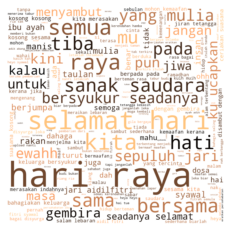

In [322]:
# Create the wordcloud object
wordcloud2 = WordCloud(width=800, height=800, background_color="white", colormap="copper", 
                      stopwords=["dan", "yang", "di", "dengan", "ini", "aku", "ku", "dalam", "ke"]).generate(lagu_raya_baru)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [323]:
#Save the file to png format
wordcloud2.to_file("lagu_baru.png")

In [324]:
old_songs1.head()

,Words,count
1,selamat,18
2,aidil,4
3,fitri,4
4,kepada,4
5,saudara,6


In [325]:
old_songs1

,Words,count
1,selamat,18
2,aidil,4
3,fitri,4
4,kepada,4
5,saudara,6
...,...,...
79,gembira,6
80,mungkin,1
81,inilah,1
82,dia,3


In [333]:
df1 = old_songs1.sort_values(by='count', ascending=False)
df1.describe

<bound method NDFrame.describe of            Words  count
3           hari     37
2           hari     37
144         hari     37
49          hari     37
44          hari     37
..           ...    ...
61       pedoman      1
125   memberkati      1
123        tuhan      1
121       rezeki      1
83   kebahagiaan      1

[849 rows x 2 columns]>

IndexError: invalid index to scalar variable.